In [1]:
import scanpy as sc
import anndata
import anndata as ad
import pandas as pd 
import numpy as np
from SCluster import SCluster
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score

plt.rcParams['figure.dpi']=300
sc.set_figure_params(fontsize=10)


In [2]:
adata=anndata.read('/nfs_genome1/wanxinjiang/SCluster/datasets/heart.h5ad')

In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [5]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [6]:
adata.raw=adata

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata= adata[:, adata.var.highly_variable]

In [8]:
adata

View of AnnData object with n_obs × n_vars = 5959 × 2170
    obs: 'annotation', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [9]:
adata=SCluster(adata=adata,\
                     sc3=True,cidr=True,sharp=True,scanpy=True,soup=True,seurat=True,simlr=True,RaceID3=True,sincera=True)

Performing SCluster clustering... 
Start estimate number of clusters ...


2023-05-11 12:56:13.273306: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: 无法打开共享对象文件: 没有那个文件或目录; LD_LIBRARY_PATH: :
2023-05-11 12:56:13.273546: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: 无法打开共享对象文件: 没有那个文件或目录; LD_LIBRARY_PATH: :
2023-05-11 12:56:13.273554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


The number of Clusters is 6.
Raw expression
5959 samples 16101 features

After selecting highly variable
5959 samples 2170 features

Start SIMLR clustering...
Start Seurat clustering...
Start RaceID3 clustering...
Start SC3 clustering...
Start SOUP clustering...
Start CIDR clustering...
Performing fast PCA.
Start SINCERA clustering...
Start SHARP clustering...
Performing k-nearest neighbour search.
Start Scanpy  clustering...
Computing the multiple Kernels.
Performing the iterative procedure  5  times.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Performing Kmeans.
Performing t-SNE.
The main loop will be now performed with a maximum of 300 iterations.
Performing iteration 1.
Performing iteration 2.
Performing iteration 3.
Performing iteration 4.
Performing iteration 5.
Performing iteration 6.
Performing iteration 7.
Performing iteration 8.
Performing iteration 9.
Performing iteration 10.
Performing iteration 11.
Performing iteration 12.
Performing iteratio

载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3


Normalization...
The maximum Silhouette index is 0.2114456 
The optimal number of clusters for individual RP is:  2 
The maximum Silhouette index is 0.1932841 
The optimal number of clusters for individual RP is:  2 
Log-transform is necessary!
-----------------------------------------------------------------------
Parameter Setting:
Using SHARP_large...
Ensemble size: 5 
The dimension has been reduced from 2170 to 314 
Partition block size: 2000 
-----------------------------------------------------------------------
Analysis starts...
Reshuffling the order of single cells...
The number of cells in Folds 1 2 3 are: 2000 1979 1980 
Process 2287984----Random Projection: 1 out of 5, Fold: 1 out of 3, Cell Number: 2000
Process 2288011----Random Projection: 1 out of 5, Fold: 2 out of 3, Cell Number: 1979
Process 2288043----Random Projection: 1 out of 5, Fold: 3 out of 3, Cell Number: 1980
Process 2288073----Random Projection: 2 out of 5, Fold: 1 out of 3, Cell Number: 2000
Process 2288100-

loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


The maximum Silhouette index is 0.2548444 
The optimal number of clusters for individual RP is:  3 
The maximum Silhouette index is 0.2729405 
The optimal number of clusters for individual RP is:  2 
The maximum Silhouette index is 0.2445465 
The optimal number of clusters for individual RP is:  3 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


The maximum Silhouette index is 0.3379803 
The number of clusters before voting is:  11 
The maximum Silhouette index is 0.4531986 
The number of clusters before voting is:  3 
The optimal number of clusters for ensemble clustering is: 3 
The maximum Silhouette index is 0.3764831 
The number of clusters before voting is:  3 
The optimal number of clusters for ensemble clustering is: 3 
The optimal number of clusters for ensemble clustering is: 3 
Number of meta-clusters is: 9 
Number of combinations: 36 
[1] 0.1466743
Number of predicted clusters: 6 
The optimal number of clusters for combining partitions is: 6 
Number of clusters: 6 
Analysis complete!
-----------------------------------------------------------------------
Total running time: 0.3828115 minutes
SHARP done.
starting worker pid=2288998 on localhost:11813 at 12:59:17.066
starting worker pid=2288999 on localhost:11813 at 12:59:17.074
starting worker pid=2288996 on localhost:11813 at 12:59:17.079
starting worker pid=2288995

载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：SC3
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
starting worker pid=2291253 on localhost:11813 at 13:02:10.528
starting worker pid=2291198 on localhost:11813 at 13:02:10.536
starting worker pid=2291279 on localhost:11813 at 13:02:10.540
starting worker pid=2291233 on localhost:11813 at 13:02:10.540
starting worker pid=2291215 on localhost:11813 at 13:02:10.542
starting worker pid=2291205 on localhost:11813 at 13:02:10.543
starting worker pid=2291212 on localhost:11813 at 13:02:10.544
starting worker pid=2291254 on localhost:11813 at 13:02:10.547
starting worker pid=2291248 on localhost:11813 at 13:02:10.548
starting worker pid=2291240 on localhost:11813 at 13:02:10.550
starting worker pid=2291259 on localhost:11813 at 13:02:10.552
starting worker pid=2291252 on localhost:11813 at 13:02:10.554
starting worker pid=2291263 on localhost:11813 at 13:02:10.557
starting worker pid=2291203 on localhost:11813 at 13:02:10.558
starting worker pid=2291200 on localhost:11813 at 13:0

载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3


boot 10 


载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3


boot 11 


载入需要的程辑包：SC3
loaded SC3 and set parent environment
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：SC3
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3


boot 12 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3


boot 13 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 14 


载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 15 


载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3


boot 16 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：SC3
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 17 


载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
loaded SC3 and set parent environment
载入需要的程辑包：SC3
载入需要的程辑包：foreach
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：rngtools


boot 18 


载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
loaded SC3 and set parent environment
载入需要的程辑包：SC3
载入需要的程辑包：rngtools
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3


boot 19 


载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 20 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 21 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rng

boot 22 


载入需要的程辑包：foreach
载入需要的程辑包：rngtools
载入需要的程辑包：SC3
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


boot 23 


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools
loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


  |===================================================================== |  99%boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
The minimum expression value was set to 0.01
86458472 (90.11173%) expression values are affected.


Prefitering genes with low expression abundancy
SOUP done.
boot 30 
14162 (87.95727%) genes passed the prefiltering criteria.
boot 31 
boot 32 
boot 33 
boot 34 

Performing dimension reduction using PCA
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 

Performing dimension reduction using tSNE

Use expression specificity to select genes for cluster identification

Plot distributions of expression specificity



There were 14 warnings (use warnings() to see them)There were 13 warnings (use warnings() to see them)There were 15 warnings (use warnings() to see them)


There were 17 warnings (use warnings() to see them)
There were 13 warnings (use warnings() to see them)
There were 21 warnings (use warnings() to see them)
There were 12 warnings (use warnings() to see them)
There were 12 warnings (use warnings() to see them)
There were 13 warnings (use warnings() to see them)
There were 13 warnings (use warnings() to see them)
There were 22 warnings (use warnings() to see them)
There were 16 warnings (use warnings() to see them)There were 14 warnings (use warnings() to see them)

There were 15 warnings (use warnings() to see them)
There were 18 warnings (use warnings() to see them)
Warning messages:
1: Quick-TRANSfer stage steps exceeded maximum (= 297950) 
2: Quick-TRANSfer stage steps exceeded maximum (= 297950) 
3: Quick-TRANSfer stage steps exceeded maximum (= 297950) 
4: Quick-TRANSfer stage s

starting worker pid=2310126 on localhost:11813 at 13:09:29.348


载入需要的程辑包：SC3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


loaded SC3 and set parent environment
载入需要的程辑包：foreach
载入需要的程辑包：rngtools


SC3 done.
CIDR done.
14162 genes selected for identifying cell clusters
Use getGenesForClustering() to view the selected genes

Using hierarchical clustering to find cell clusters

Updating cell meta data "CLUSTER"

Updating cell meta data "GROUP"

Copied meta data 'CLUSTER' to 'GROUP'
SINCERA done.
Seurat done.
RaceID3 done.
SIMLR done.
sharp 6 simlr
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The retained adata of the first clustering...

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
adata.write('/nfs_genome1/wanxinjiang/SCluster/results/SCluster_heart.h5ad',compression='gzip')

In [11]:
def evaluate(true_labels,pre_labels):
    ari=''
    h_score=''
    nmi=''
    ## ARI ##
    ari=adjusted_rand_score(true_labels,pre_labels)
    ## homogeneity_score ##
    # h_score=homogeneity_score(true_labels,pre_labels)
    ## NMI ##
    nmi=normalized_mutual_info_score(true_labels,pre_labels)
    ##  FM ## 
    fm=fowlkes_mallows_score(true_labels,pre_labels)
    return [ari,nmi,fm]

In [18]:
eva=[]
SCluster_eva=evaluate(adata.obs['annotation'],adata.obs["SCluster"])
eva.append(['SCluster',SCluster_eva])
try:
    soup=evaluate(adata.obs['annotation'],adata.obs["soup"])
    eva.append(["soup",soup])
except:
    pass

try:
    sharp=evaluate(adata.obs['annotation'],adata.obs["sharp"])
    eva.append(["sharp",sharp])
except:
    pass

try:
    scanpy=evaluate(adata.obs['annotation'],adata.obs["scanpy"])
    eva.append(["scanpy",scanpy])
except:
    pass

try:
    seurat=evaluate(adata.obs['annotation'],adata.obs["seurat"])
    eva.append(["seurat",seurat])
except:
    pass

try:
    sc3=evaluate(adata.obs['annotation'],adata.obs["sc3"])
    eva.append(["sc3",sc3])
except:
    pass

try: 
    sincera=evaluate(adata.obs['annotation'],adata.obs["sincera"])
    eva.append(["sincera",sincera])
except:
    pass

try:
    cidr=evaluate(adata.obs['annotation'],adata.obs["cidr"])
    eva.append(["cidr",cidr])
except:
    pass

try:
    simlr=evaluate(adata.obs['annotation'],adata.obs["simlr"])
    eva.append(['simlr',simlr])
except:
    pass

try:
    RaceID3=evaluate(adata.obs['annotation'],adata.obs["RaceID3"])
    eva.append(['RaceID3',RaceID3])
except:
    pass

_methods=[]
_eva=[]
for i in eva:
    _methods.append(i[0])
    _eva.append(i[1])
eva_d=pd.DataFrame(_eva)
eva_d.columns=['ARI','NMI','FM']
eva_d.index=_methods
eva_d

,ARI,NMI,FM
SCluster,0.761901,0.520817,0.951893
soup,0.217631,0.370233,0.681922
sharp,0.761901,0.520817,0.951893
scanpy,0.236246,0.408584,0.690617
seurat,0.261826,0.494252,0.713998
sc3,0.187483,0.268322,0.643241
sincera,-0.035236,0.081977,0.501468
cidr,0.180615,0.283473,0.642039
simlr,0.016905,0.095441,0.391676
RaceID3,0.067423,0.140718,0.476119


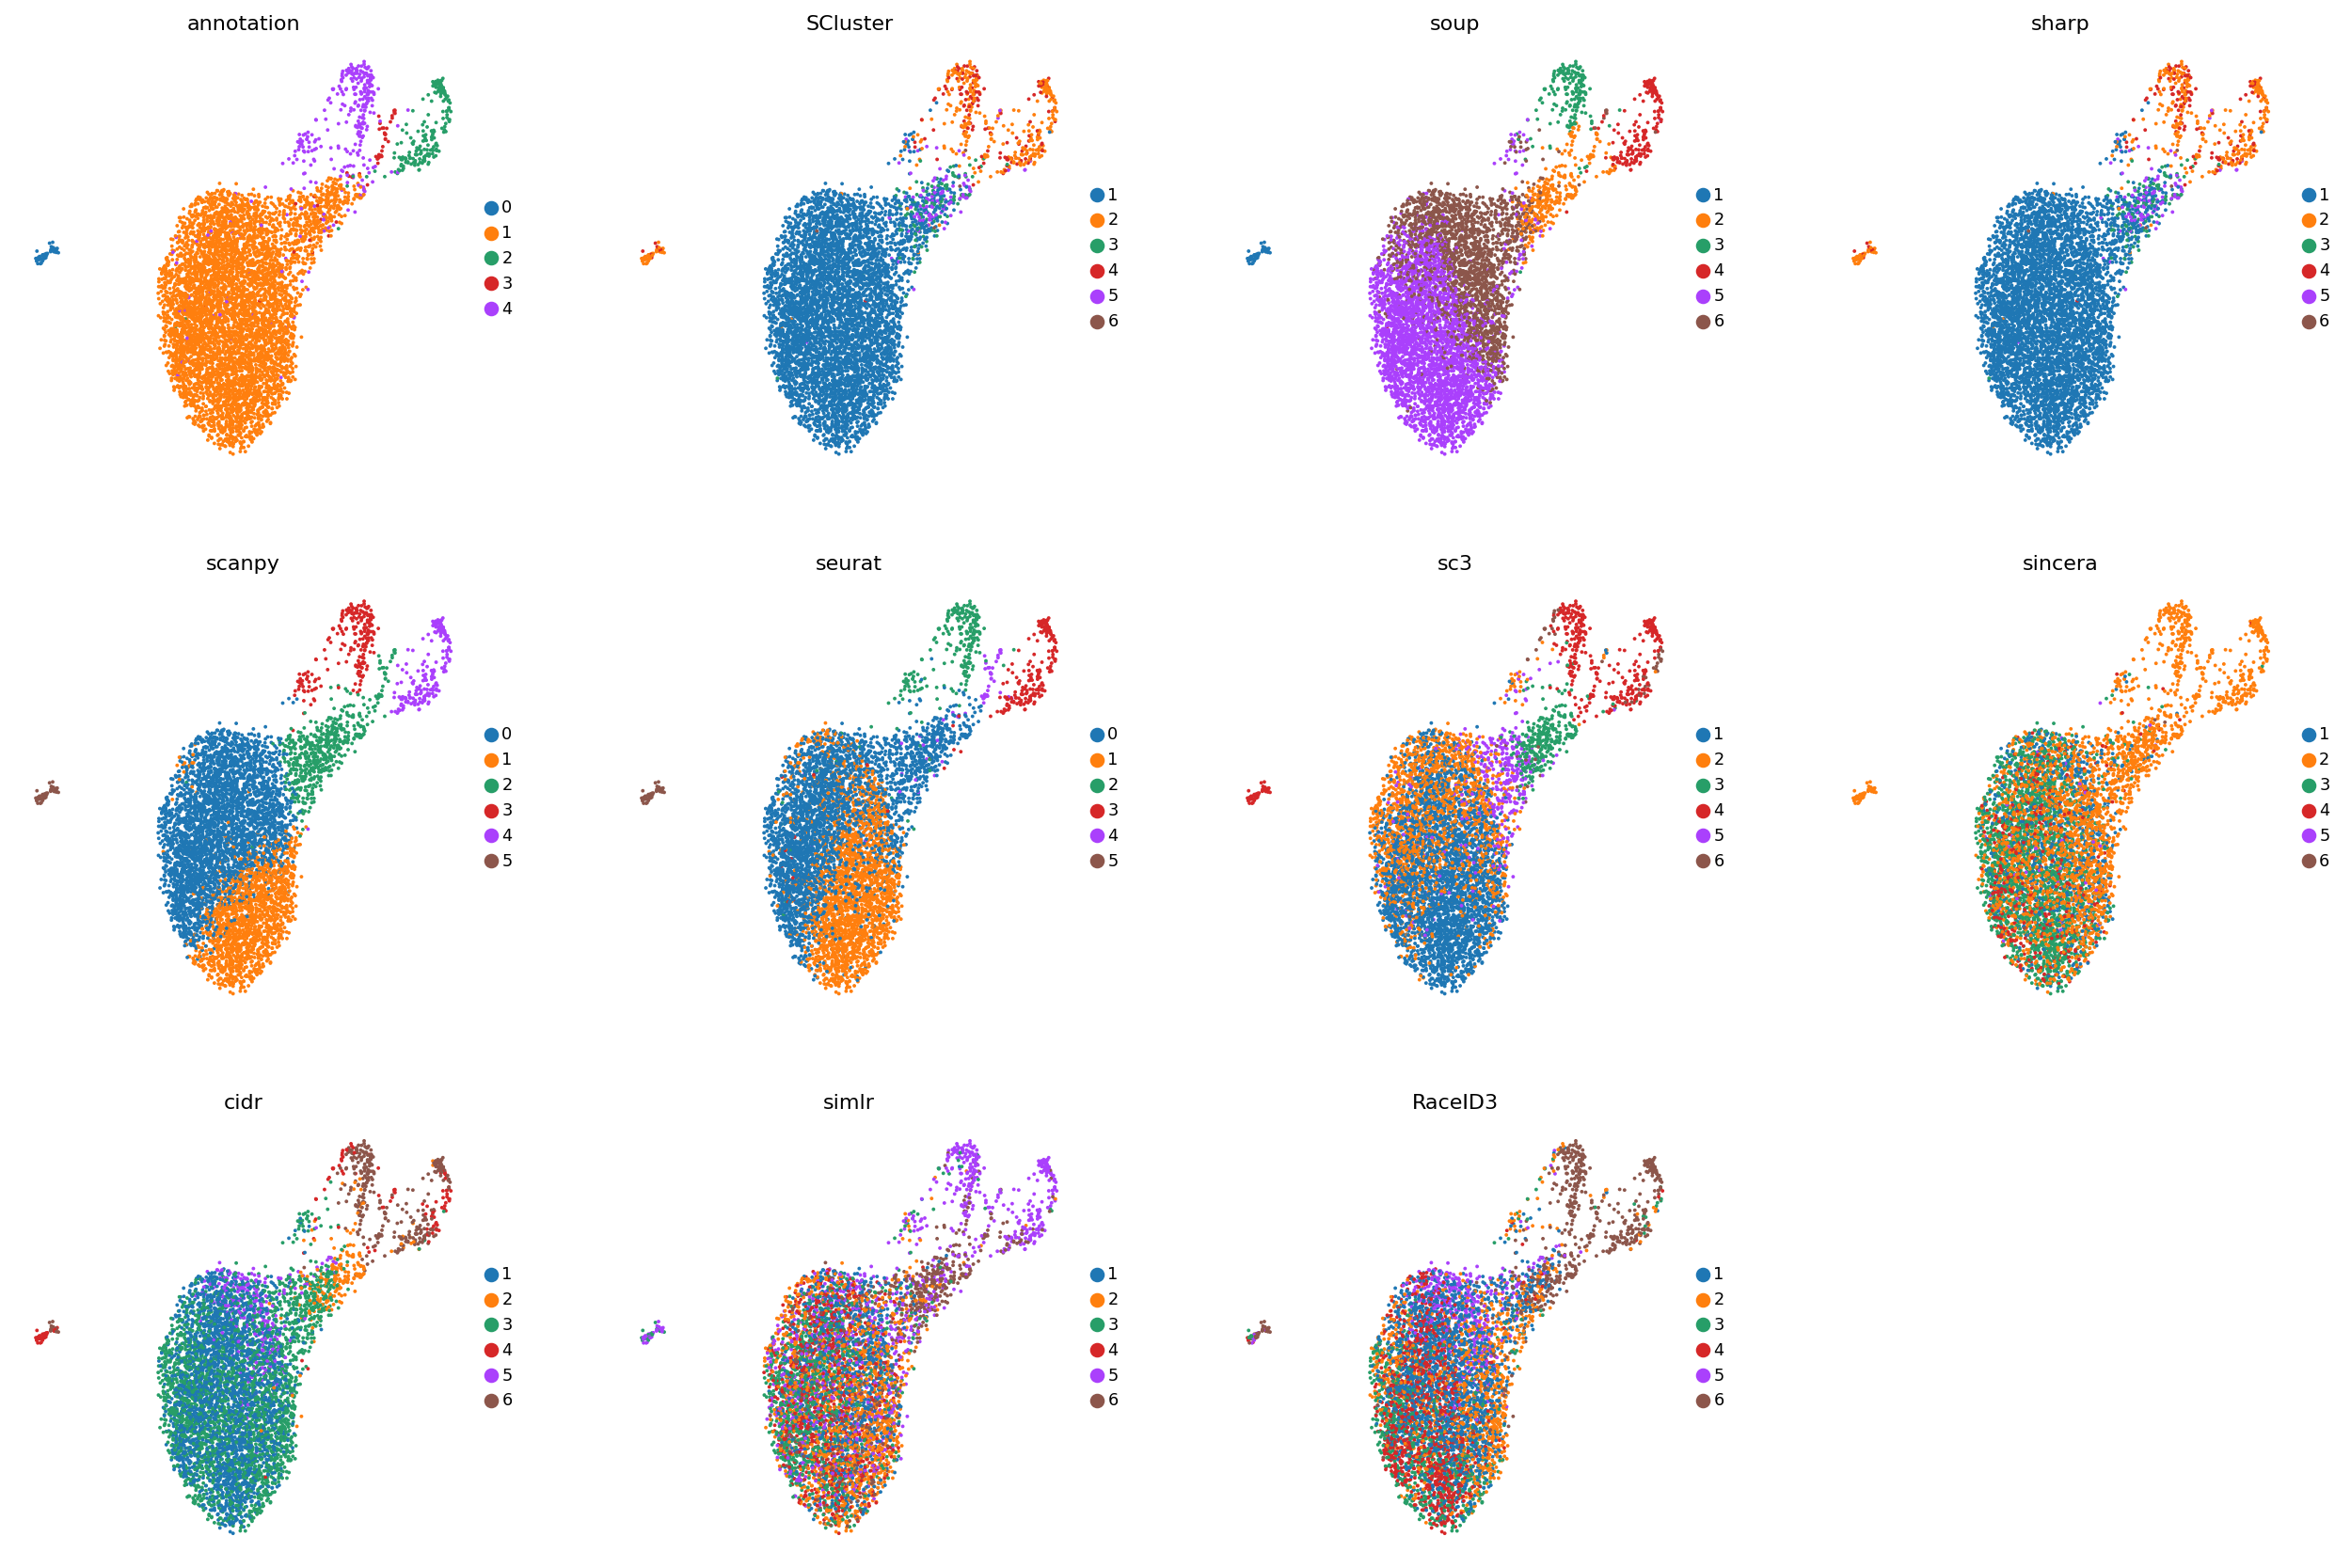

In [13]:
plt.rcParams['figure.dpi']=300
sc.set_figure_params(fontsize=10)
adata.obs['annotation']=adata.obs['annotation'].astype('category')
sc.pl.umap(adata,color=['annotation']+_methods,legend_fontsize=8,s=12,frameon=False)

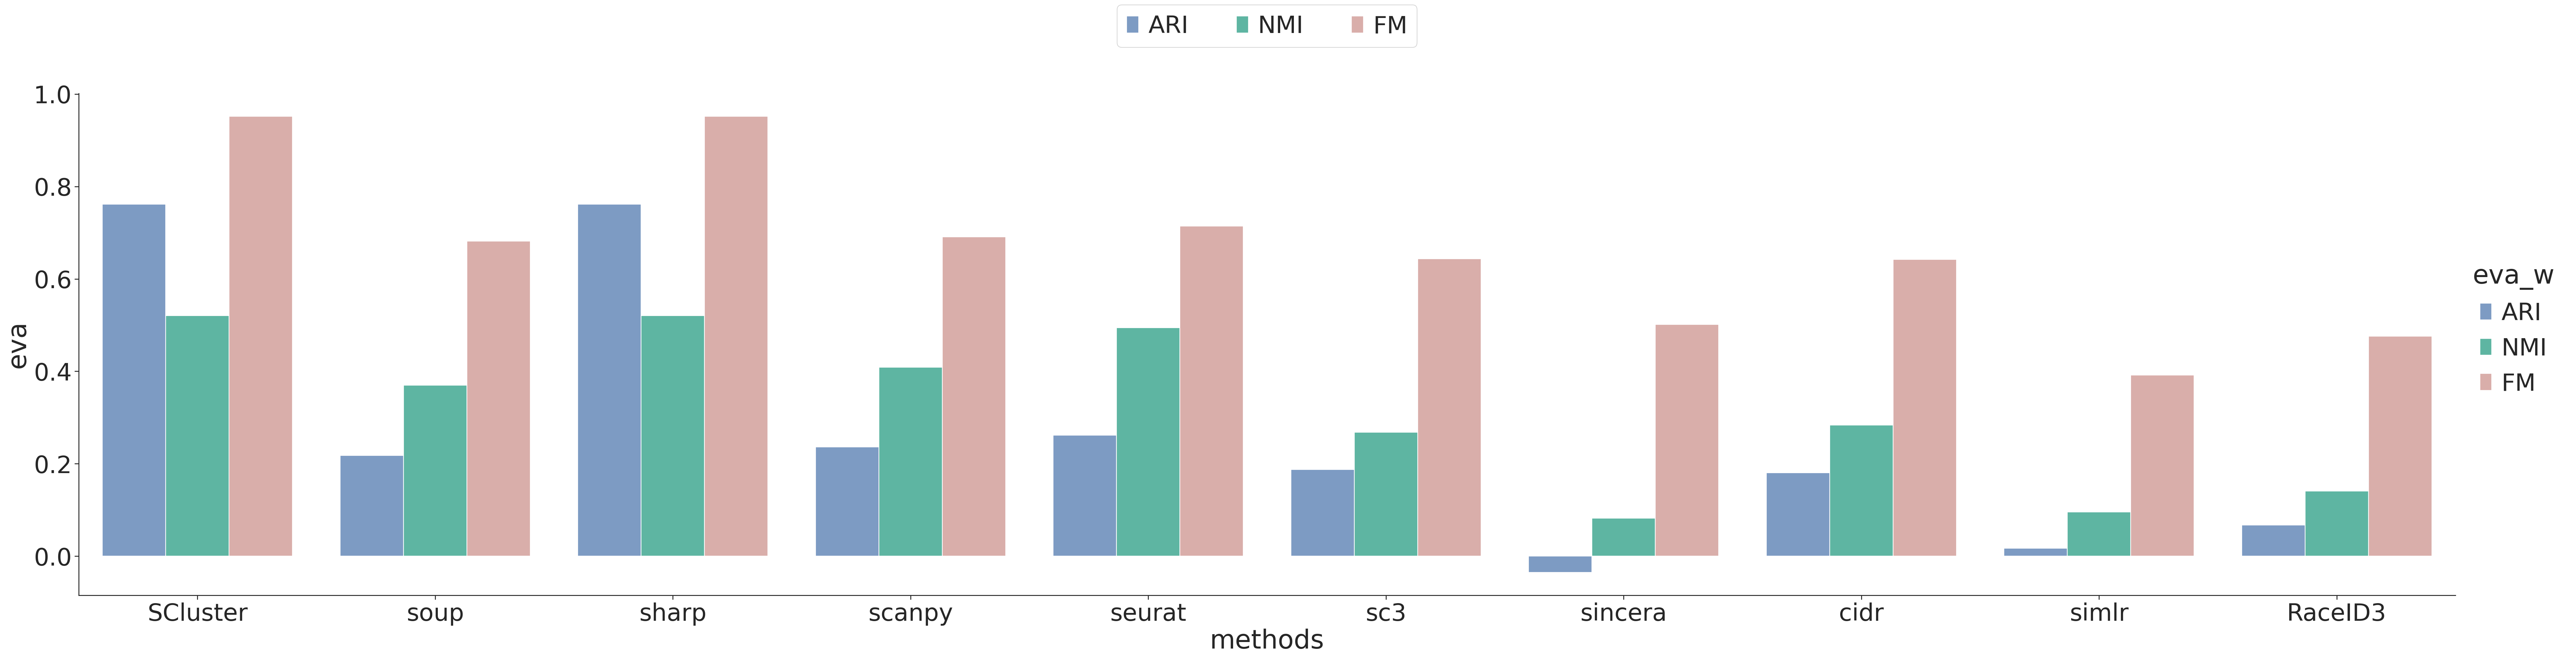

In [14]:
def tips(methods,eva):
    tip=pd.DataFrame()
    tip['eva']=eva
    tip['eva_w']=['ARI','NMI','FM']
    tip['methods']=[methods for _ in range(3)]
    return tip
data=[]
for i in zip(_methods,_eva):
    data.append(tips(i[0],i[1]))
data=pd.concat(data)

# sns.set(font_scale = 5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params,font_scale = 3)
# Draw a nested barplot by species and sex
fig=sns.catplot(
    data=data, kind="bar",
    x="methods", y="eva", hue="eva_w",
    errorbar="sd", palette=['#7199cf', '#4fc4aa', '#e1a7a2'], height=12,aspect=4
)
plt.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2), ncol=3)

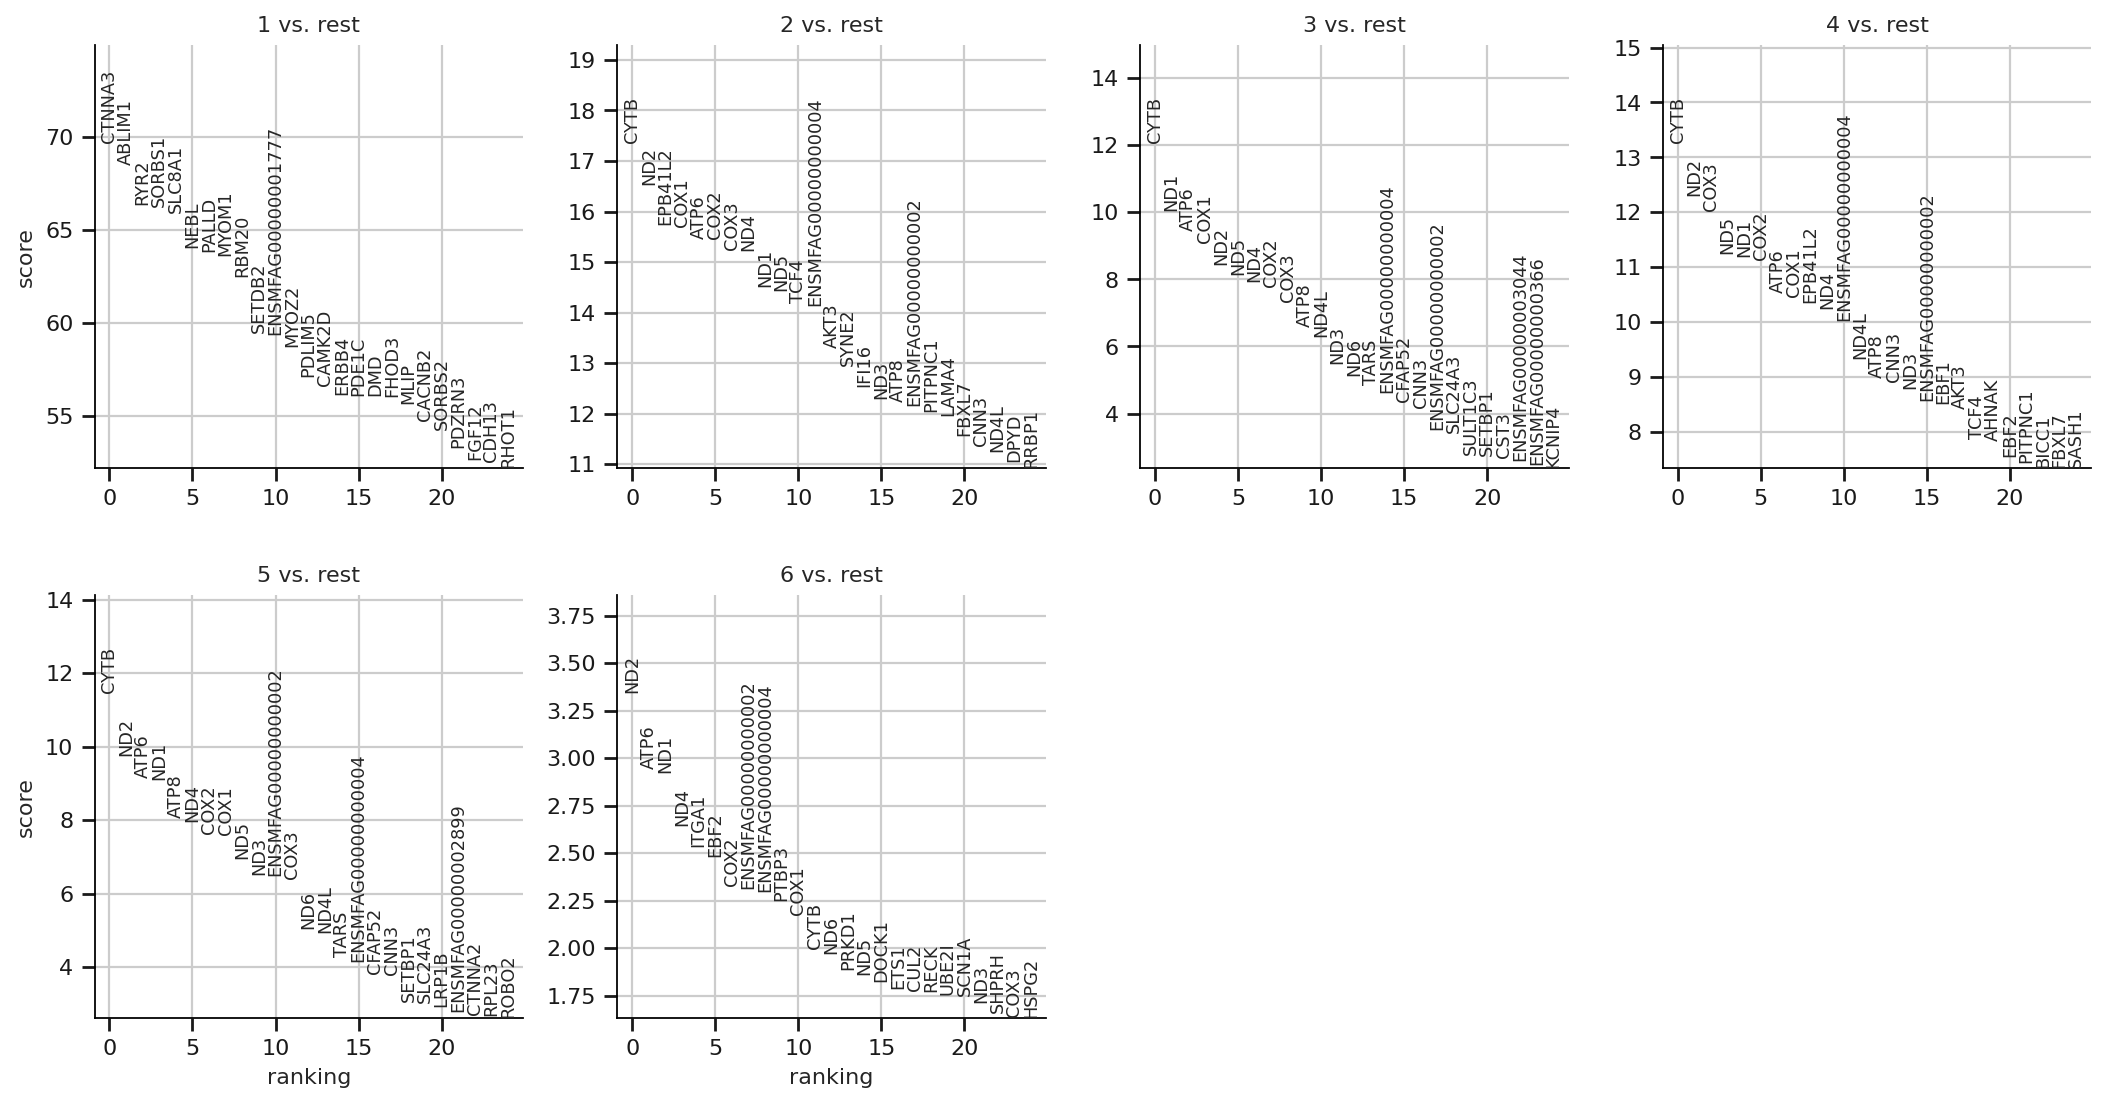

In [15]:
plt.rcParams['figure.dpi']=500
sc.set_figure_params(fontsize=10)
sc.tl.rank_genes_groups(adata, 'SCluster', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [16]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
maker=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)
maker

,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p
0,CTNNA3,0.0,CYTB,7.002267e-49,CYTB,3.656503e-22,CYTB,2.744383e-26,CYTB,3.465341e-20,ND2,0.012299
1,ABLIM1,0.0,ND2,2.328315e-45,ND1,2.132670e-17,ND2,7.836849e-24,ND2,2.414711e-16,ATP6,0.021573
2,RYR2,0.0,EPB41L2,3.929774e-42,ATP6,5.185073e-16,COX3,4.161030e-23,ATP6,5.432583e-15,ND1,0.022143
3,SORBS1,0.0,COX1,3.002997e-42,COX1,3.465608e-15,ND5,4.031731e-21,ND1,7.345245e-15,ND4,0.033224
4,SLC8A1,0.0,ATP6,3.088847e-41,ND2,1.139861e-13,ND1,4.830678e-21,ATP8,1.327019e-12,ITGA1,0.039050


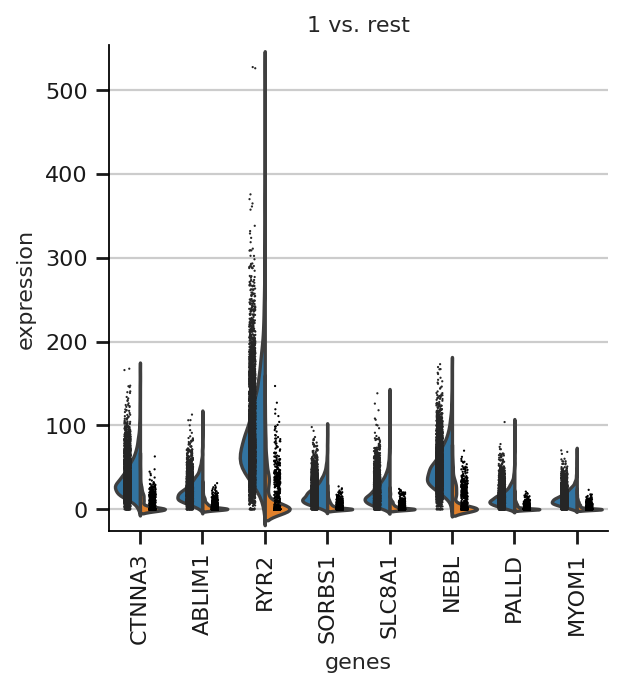

In [17]:
sc.pl.rank_genes_groups_violin(adata, groups=['1'], n_genes=8)